In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA


In [4]:
# get theCSV dtat here and print
df= pd.read_csv('cancer.csv')

In [5]:
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [6]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [7]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.shape   #  check shape

(569, 31)

In [9]:
df.describe()   #  dataframe statistical information

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
x=df.drop(['diagnosis'], axis=1)

In [11]:
scaler= StandardScaler()
scaled= scaler.fit_transform(x)

In [12]:
pca= PCA()
pca.fit_transform(scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

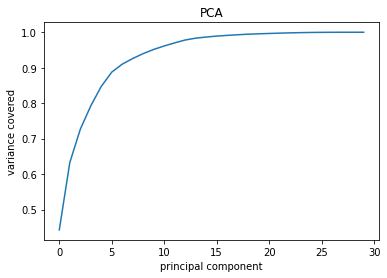

In [13]:
#  let's plot scree plot to check the how many feature are covered more 
                                            #            variance (that call best component)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal component')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [14]:
pca= PCA(n_components= 13)
new_comp= pca.fit_transform(scaled)
p_comp= pd.DataFrame(new_comp, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8',
                                        'pc9','pc10','pc11','pc12','pc13'])

In [16]:
p_comp.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157117,-0.877402,0.262956,-0.859010,0.103392
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240990,-0.711908,1.106999,0.813121,0.157919,-0.943550
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024066,0.454274,-0.605605,0.124385,-0.410624


In [17]:
df['diagnosis']= df['diagnosis'].replace({'M':1, 'B':0})

In [18]:
y= df.diagnosis

In [19]:
df.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
29,1,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,...,20.01,19.52,134.9,1227.0,0.1255,0.2812,0.24890,0.14560,0.2756,0.07919
371,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.5,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
549,0,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,...,13.03,31.45,83.9,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626


In [20]:
# DATA split into train and test
x_train,x_test,y_train,y_test= TTS(p_comp,y, test_size= 0.25, random_state=49)

In [67]:
def score(clf,xtrain,xtest,ytrain,ytest,train=True):
    if train:       # train==True / train: all same means
        y_pred=clf.predict(xtrain)
       
        print(f"Training_Accuracy_score==: {accuracy_score(ytrain,y_pred)* 100:.2f}% " )
    elif train == False:
        pred= clf.predict(xtest)

        print(f"Test_Accuracy_score== : {accuracy_score(ytest,pred)* 100:.2f}% " )
        print('\n \n Test_ classification report== \n', classification_report(ytest,pred))

In [22]:
from sklearn.svm import SVC
svc= SVC()

In [68]:
# svc fitting the  model 
svc.fit(x_train,y_train)

#  call the function and pass dataset to check train & test
print(score(svc,x_train,x_test,y_train,y_test, train=True))

print(score(svc,x_train,x_test,y_train,y_test, train=False))

Training_Accuracy_score==: 99.30% 
None
Test_Accuracy_score== : 95.80% 

 
 Test_ classification report== 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        93
           1       1.00      0.88      0.94        50

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143

None


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc= GradientBoostingClassifier()

In [53]:
gbc.fit(x_train,y_train)   #  fit the model

# call the function and pass argument to check train & test accuracy
score(gbc,x_train,x_test,y_train,y_test, train=True)

score(gbc,x_train,x_test,y_train,y_test, train=False)


Training_Accuracy_score==: 100.00% 
Test_Accuracy_score== : 90.91% 

 
 Test_ classification report== 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        93
           1       0.89      0.84      0.87        50

    accuracy                           0.91       143
   macro avg       0.91      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



In [54]:
# let's apply hyperparameter with GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV

In [55]:
# HYPER PARAMETER TUNING with SVM
#     C = it is hyper paramater in svm to control error ,how much error we can allow.
#      low C means allowing less no. of error and high C value means allowing more no. of error
#  gamma= Gamma decides that how much curvature we want in a decision boundary, gamma  high means 
#      more curvature  gammalow means less curvature

In [57]:
grid= {'C':[1,5,7,9],'gamma': [0.001,0.003,0.008,0.01,0.08]}
gcv=GridSearchCV(svc,grid)

In [58]:
gcv.fit(x_train,y_train)

gcv.best_params_

{'C': 7, 'gamma': 0.01}

In [60]:
svm= SVC(C=7,gamma=0.008)

svm.fit(x_train,y_train)

print(score(svm,x_train,x_test,y_train,y_test, train=True))
print(score(svm,x_train,x_test,y_train,y_test, train=False))

Training_Accuracy_score==: 99.06% 
None
Test_Accuracy_score== : 96.50% 

 
 Test_ classification report== 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        93
           1       1.00      0.90      0.95        50

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

None


In [69]:
# COMPLETE

In [70]:
# IN REAL WORLD the final model is built with pipeline . we work on all preprocessing work steps,
#     do EDA ,make analysis etc. once we find all the hyperparameter and feature selection etc, we 
#      use the main technique and create pipeline. this well be clean and better flow of data through 
#      series of sequences


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [75]:
x_train,x_test,y_train, y_test = TTS(x,y, test_size=0.25, random_state=48)

In [76]:
pipe= Pipeline([('scaler', StandardScaler()),  #  1st  apply standardscaler fit_transform
               ('PCA', PCA(n_components=13)),  # 2nd apply PCA 
               ('SVM', SVC(C=7,gamma=0.008))])   # and last apply 'svc' algorithm

In [78]:
pipe.fit(x_train,y_train)

y_pred= pipe.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9790209790209791


In [ ]:
#  NOTE
#   YOU NEED TO KNOW THE execution sequence=   as  imputation technique apply befor Standardscaler
#      and then use PCA, and last apply  fit model 


# pipeline cannot use for plotting or EDA and data analysis